# Initiering

In [13]:
% reset
# Initiering
# Import packages
import json
import sympy
import numpy
import matplotlib.pyplot as plt
from sympy import *
from matplotlib.pyplot import *
init_printing()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# IS-LM modellen

In [14]:
# Declaring variables
## Endogenous
Y, C, I, G, Ld, Ms, P, M = sympy.symbols('Y C I G L_d M_s, P, M')
Ys, Id = sympy.symbols('Y^s I^d')
## Parametere og konstantledd
oC, c1, b, oI, k, h, t = sympy.symbols('oC c_1 b oI, k, h, t')
## Exogene styringsvariableh
oG, i, T = sympy.symbols('oG i T')

In [32]:
beforems = set(dir())
## Aktører
### Husholdningero
#### Konsumfunksjon
CD = Eq(C,oC + c1*(Y-T))
#### Pengeetterspørsel
LD = Eq(Ld,k*Y-h*i)
### Bedrifter
YS = Eq(Ys, Y)
#### Investeringer
ID = Eq(Id,oI - b*i)
## Offentlig
### Offentlig myndigheter
GD = Eq(G, oG)
TR = Eq(T, t*Y)

### Sentralbanken
MS = Eq(Ms,M/P)
## Markeder
### Varemarkedet
EQV = Eq(Y, C + I + G)
### Pengemarkedet
EQM = Eq(Ld, Ms)

## Løsning av modellen
## IS
ISC = Eq(Y,solve(EQV.subs([(G, solve(GD, G)[0]),(C,solve(CD, C)[0]), (I, solve(ID, Id)[0])]), Y)[0])
## LM
LMC = Eq(Y,solve(EQM.subs([(Ms, solve(MS,Ms)[0]),(Ld,solve(LD,Ld)[0])]),Y)[0])
## Likvekt? 
SEQi=Eq(i,solve(LMC.subs(Y,solve(ISC,Y)[0]),i)[0])
SEQY=Eq(Y,solve(ISC.subs(i,solve(LMC,i)[0]),Y)[0])
AD = Eq(Y,solve(EQV.subs([(G, solve(GD, G)[0]),(C,solve(CD, C)[0]), (I, solve(ID, Id)[0])]), Y)[0])
afterms = set(dir())

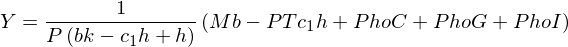

In [31]:
SEQY

In [16]:
modvardict = list(afterms - beforems)
modvardict.remove('beforems')
#
modlatequ = dict()
modequ = dict()

for teller in range(0,len(modvardict)):
    eqvar = modvardict[teller]
    modlatequ[eqvar] = latex(eval(modvardict[teller]))
    modequ[eqvar] = str(eval(modvardict[teller]).rhs)
   
expdeftex = open('islmtex.json', 'w')
json.dump(modlatequ,expdeftex)
expdeftex.close()
expdefequ = open('islmequ.json', 'w')
json.dump(modequ,expdefequ)
expdefequ.close()
modvardict

['YS', 'EQV', 'CD', 'SEQi', 'LD', 'EQM', 'MS', 'LMC', 'ID', 'GD', 'TR', 'ISC']